In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline
# sns.set(color_codes=True)

In [2]:
# Load data
walking_train = pd.read_csv('./walking-classifier/walking_dataset1.csv').drop('#time', axis=1)
standing_train = pd.read_csv('./walking-classifier/standing_dataset1.csv').drop('#time', axis=1)
walking_test = pd.read_csv('./walking-classifier/walking_dataset2.csv').drop('#time', axis=1)
standing_test = pd.read_csv('./walking-classifier/standing_dataset2.csv').drop('#time', axis=1)

# Add labels
walking_train['label'] = 1
walking_test['label'] = 1
standing_train['label'] = 0
standing_test['label'] = 0

In [3]:
walking_train.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0
mean,34.227771,3.995729,15.713083,3.303812,16.621167,3.394125,1.0
std,4.889576,2.271102,2.839695,1.667285,3.092094,1.792090,0.0
min,19.330000,0.000000,5.500000,0.000000,6.750000,0.000000,1.0
25%,30.500000,2.375000,14.000000,2.050000,14.750000,2.105000,1.0
50%,35.500000,3.630000,15.750000,3.200000,16.670000,3.100000,1.0
75%,37.750000,5.342500,17.670000,4.440000,18.670000,4.425000,1.0
max,43.500000,14.500000,23.500000,8.860000,26.000000,9.740000,1.0


In [4]:
standing_train.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0
mean,44.334729,0.432958,11.646146,0.843062,13.443708,0.933000,0.0
std,2.476940,0.370591,3.698519,0.888806,5.401794,0.673609,0.0
min,33.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,42.250000,0.000000,9.750000,0.430000,9.330000,0.470000,0.0
50%,45.000000,0.470000,12.250000,0.500000,14.750000,0.830000,0.0
75%,46.500000,0.500000,14.500000,1.220000,17.750000,1.250000,0.0
max,48.000000,3.900000,18.750000,5.790000,23.000000,5.020000,0.0


In [5]:
train_data = walking_train.append([standing_train])

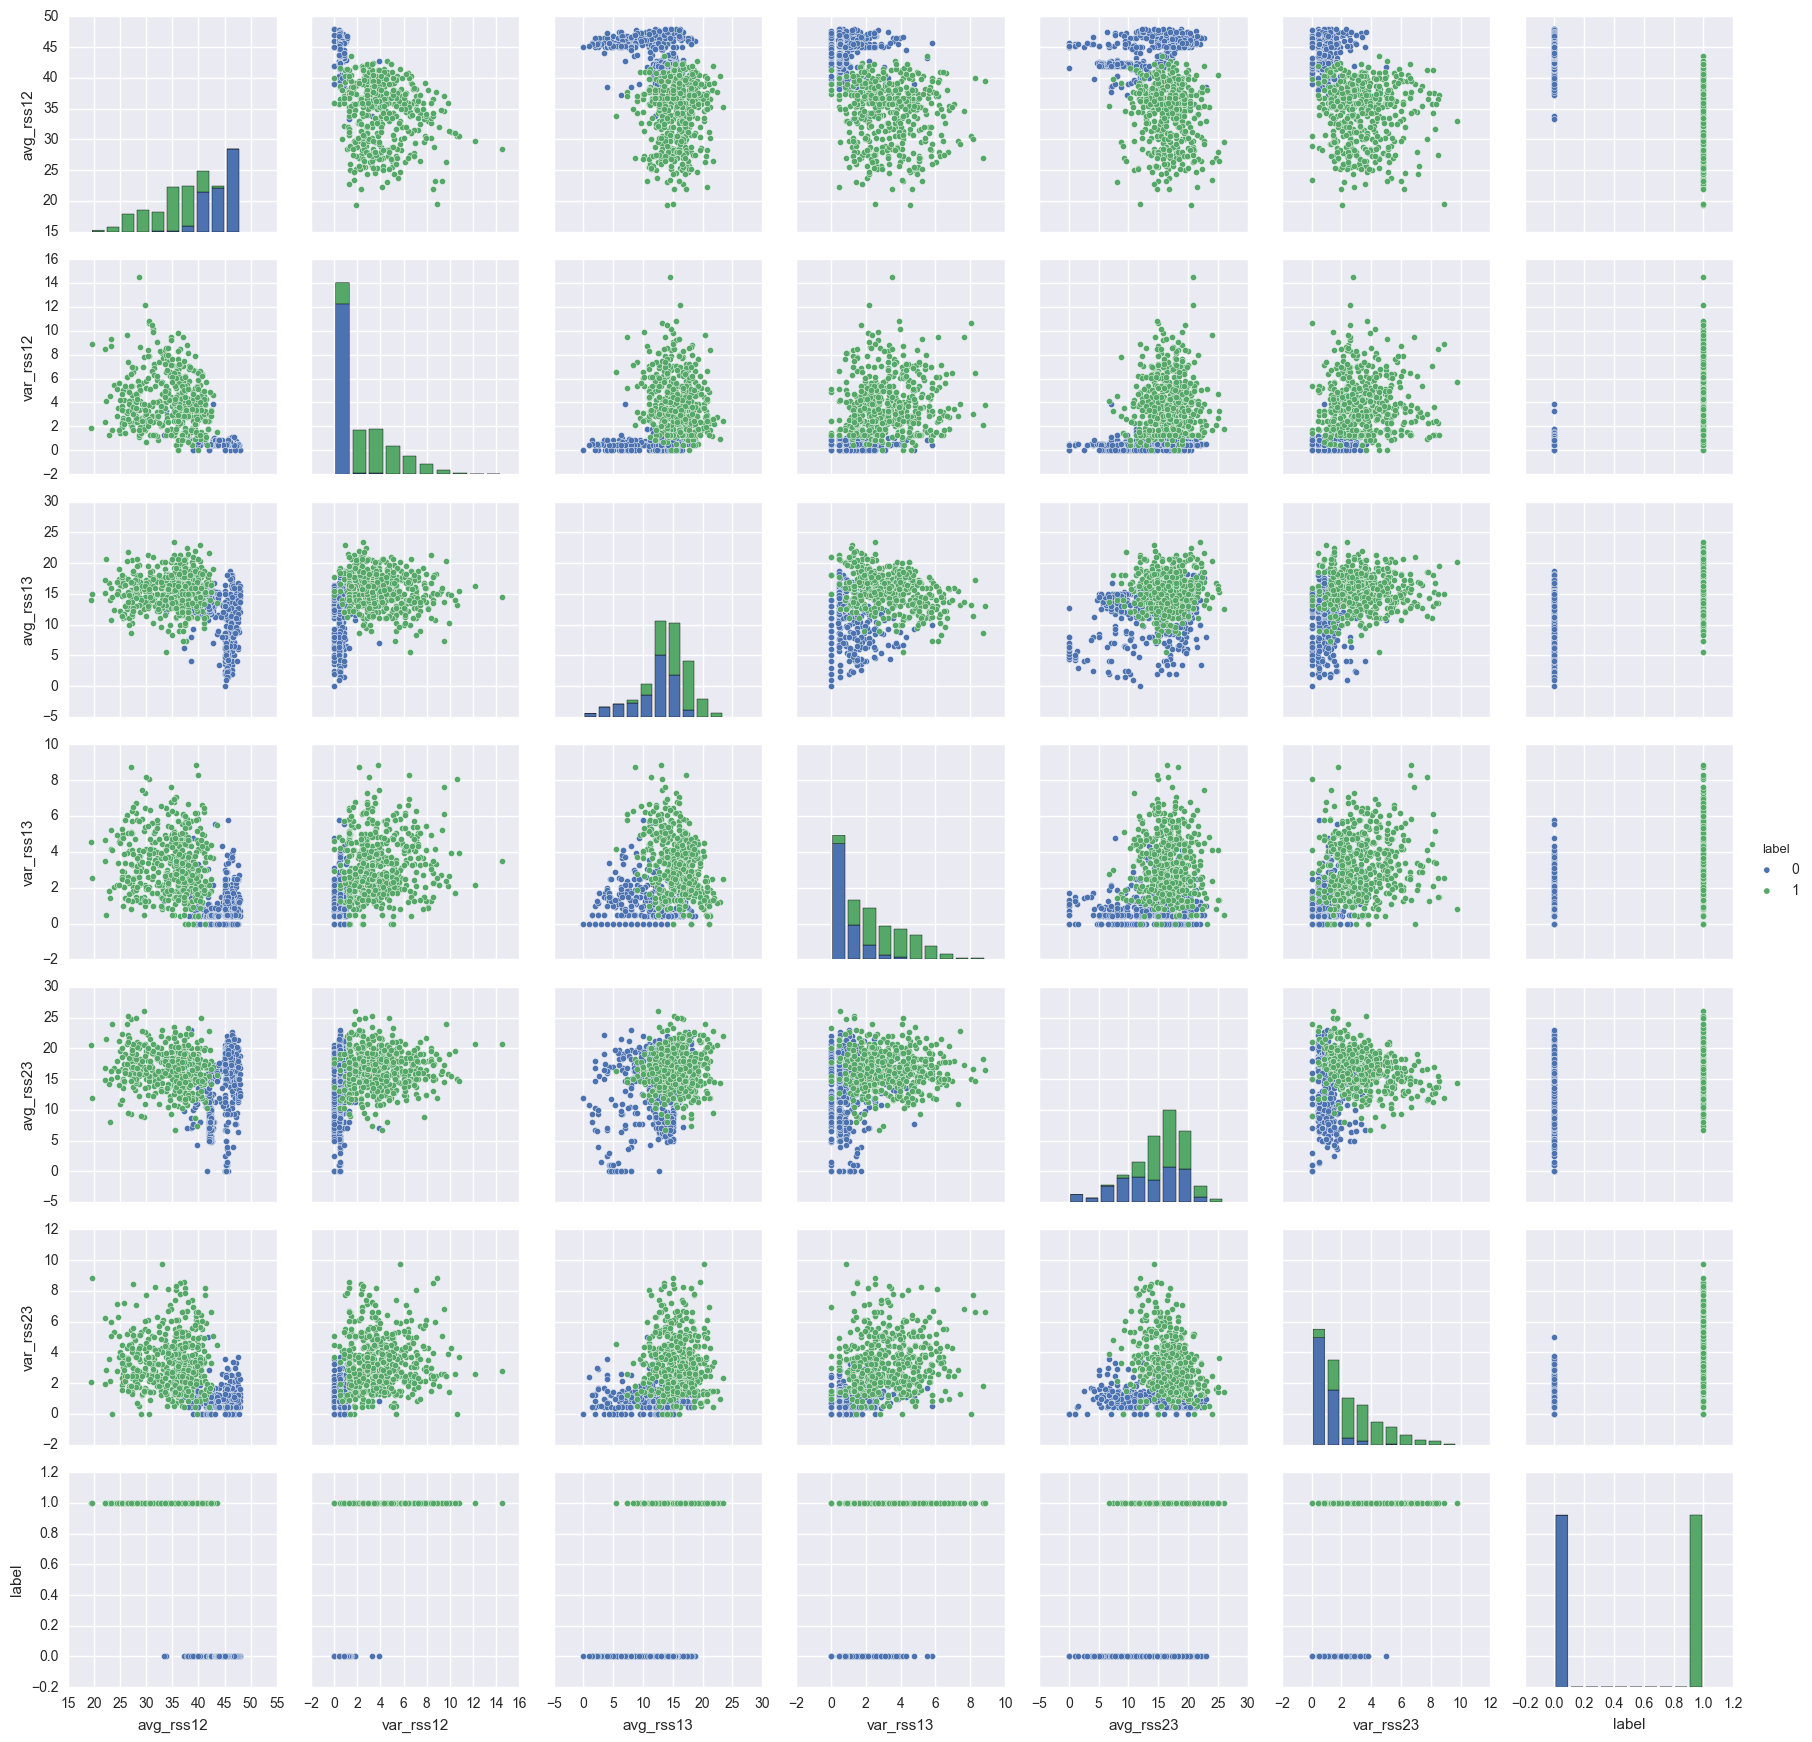

In [6]:
sns.pairplot(train_data, hue="label")

In [7]:
#Training the model with training data sets
model = LogisticRegression()
model = model.fit(train_data.drop(['label'], axis=1), train_data['label'])
model.score(train_data.drop(['label'], axis=1), train_data['label'])

0.99062499999999998

In [8]:
standing_pred_acc = accuracy_score(model.predict(standing_test.drop(['label'], axis=1)), standing_test['label'])
walking_pred_acc = accuracy_score(model.predict(standing_test.drop(['label'], axis=1)), standing_test['label'])
print('Standing accuracy', standing_pred_acc)
print('Waliking accuracy', walking_pred_acc)

Standing accuracy 0.99375
Waliking accuracy 0.99375


In [19]:
model = RandomForestClassifier(n_estimators=4, max_depth=15)
model = model.fit(train_data.drop(['label'], axis=1), train_data['label'])
model.score(train_data.drop(['label'], axis=1), train_data['label'])

0.99479166666666663

In [18]:
standing_pred_acc = accuracy_score(model.predict(standing_test.drop(['label'], axis=1)), standing_test['label'])
walking_pred_acc = accuracy_score(model.predict(standing_test.drop(['label'], axis=1)), standing_test['label'])
print('Standing accuracy', standing_pred_acc)
print('Waliking accuracy', walking_pred_acc)

Standing accuracy 0.979166666667
Waliking accuracy 0.979166666667
